In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None)

# Seaborn options
sns.set(style="whitegrid", font_scale=1.4)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

## Dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
PICKLE_PATH = "/content/drive/MyDrive/allocine_dataset.pickle"

with open(PICKLE_PATH, 'rb') as reader:
    data = pickle.load(reader)

X_train, y_train = np.array(data["train_set"]['review']), np.array(data["train_set"]['polarity'])
X_val, y_val = np.array(data["val_set"]['review']), np.array(data["val_set"]['polarity'])
X_test, y_test = np.array(data["test_set"]['review']), np.array(data["test_set"]['polarity'])
class_names = data['class_names']

print("LEN TRAIN: "+ str(len(X_train)))
print("LEN VAL: "+ str(len(X_val)))
print("LEN TEST: "+ str(len(X_test)))

LEN TRAIN: 160000
LEN VAL: 20000
LEN TEST: 20000


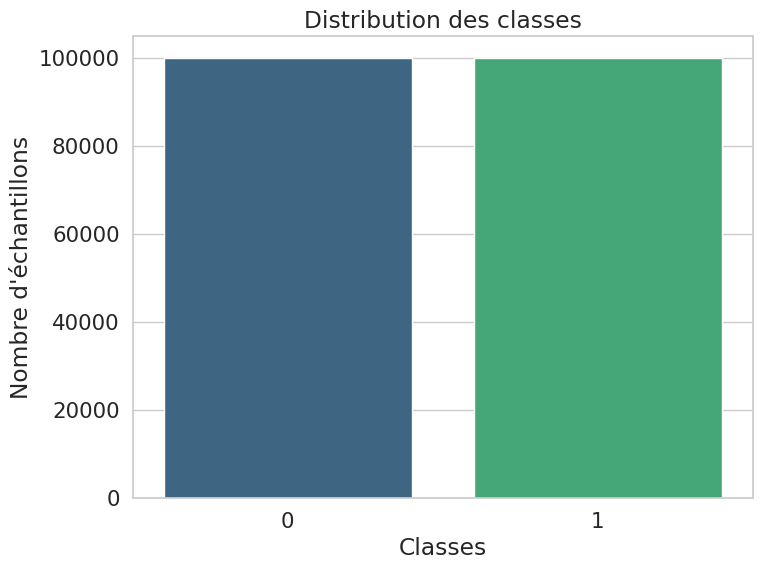

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que class_names soit une liste de noms de classes, par exemple ['Positive', 'Negative']
# Si class_names est un dictionnaire, utilisez class_names.keys() au lieu de list(class_names).
class_names = list(data['class_names'])

# Concaténer tous les ensembles pour obtenir la distribution globale
all_labels = np.concatenate([y_train, y_val, y_test])

# Créer un graphique de comptage
plt.figure(figsize=(8, 6))
sns.countplot(x=all_labels, palette='viridis')

# Ajouter des étiquettes et un titre
plt.title('Distribution des classes')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')

# Personnaliser les étiquettes des classes
plt.xticks(np.arange(len(class_names)), class_names)

# Afficher le graphique
plt.show()

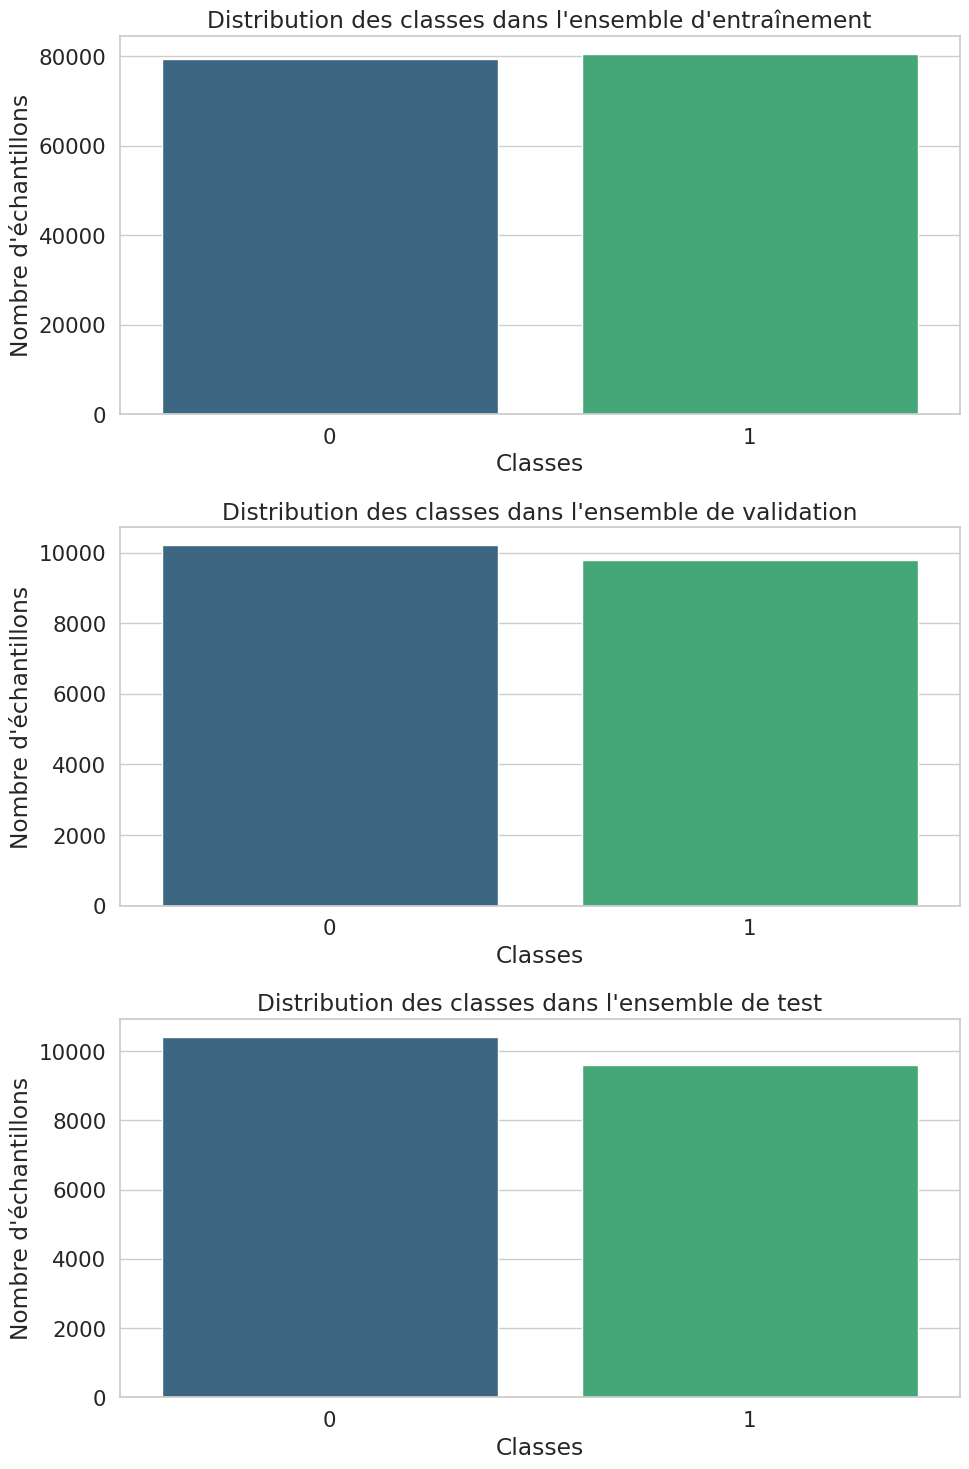

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que class_names soit une liste de noms de classes, par exemple ['Positive', 'Negative']
# Si class_names est un dictionnaire, utilisez class_names.keys() au lieu de list(class_names).
class_names = list(data['class_names'])

# Créer des sous-graphiques pour train, val et test
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution des classes dans l'ensemble d'entraînement
sns.countplot(x=y_train, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution des classes dans l\'ensemble d\'entraînement')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Nombre d\'échantillons')
axes[0].set_xticks(np.arange(len(class_names)))
axes[0].set_xticklabels(class_names)

# Distribution des classes dans l'ensemble de validation
sns.countplot(x=y_val, ax=axes[1], palette='viridis')
axes[1].set_title('Distribution des classes dans l\'ensemble de validation')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Nombre d\'échantillons')
axes[1].set_xticks(np.arange(len(class_names)))
axes[1].set_xticklabels(class_names)

# Distribution des classes dans l'ensemble de test
sns.countplot(x=y_test, ax=axes[2], palette='viridis')
axes[2].set_title('Distribution des classes dans l\'ensemble de test')
axes[2].set_xlabel('Classes')
axes[2].set_ylabel('Nombre d\'échantillons')
axes[2].set_xticks(np.arange(len(class_names)))
axes[2].set_xticklabels(class_names)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


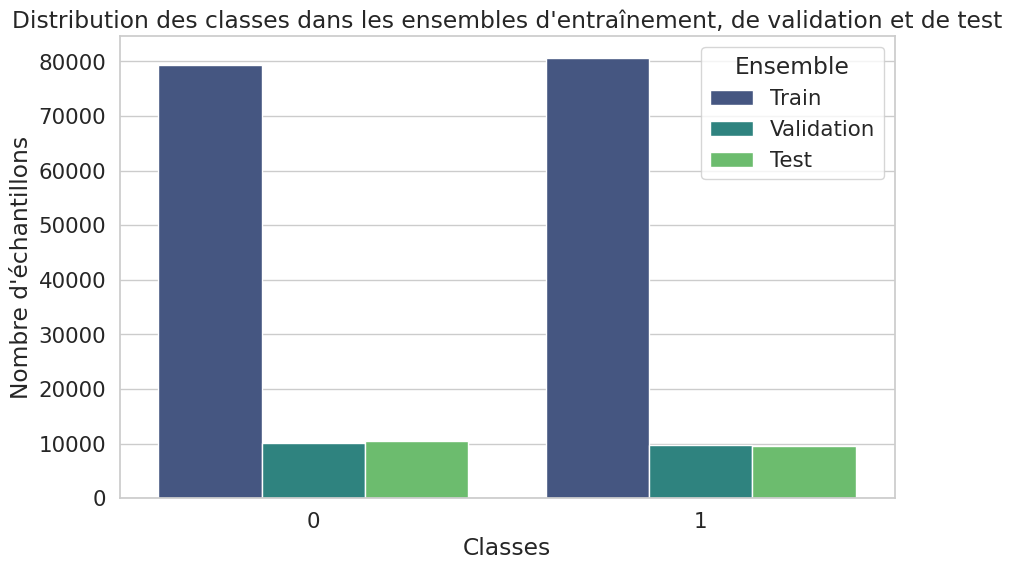

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concaténer les données d'entraînement, de validation et de test
all_labels = np.concatenate([y_train, y_val, y_test])

# Créer un DataFrame pour utiliser dans seaborn
df = pd.DataFrame({'Classes': all_labels, 'Ensemble': ['Train'] * len(y_train) + ['Validation'] * len(y_val) + ['Test'] * len(y_test)})

# Créer un graphique de comptage avec hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Classes', hue='Ensemble', data=df, palette='viridis')

# Ajouter des étiquettes et un titre
plt.title('Distribution des classes dans les ensembles d\'entraînement, de validation et de test')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')

# Personnaliser les étiquettes des classes
plt.xticks(np.arange(len(class_names)), class_names)

# Afficher la légende
plt.legend(title='Ensemble')

# Afficher le graphique
plt.show()


# Model selection

## First model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tfidf_clf = Pipeline([
    ('tfidf', TfidfVectorizer()), # Default parameters
    ('clf', LogisticRegression(n_jobs=-1, verbose=1)),
])

tfidf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=-1, verbose=1))])

## Prediction

In [ ]:
some_index = 0
some_review = X_val[some_index]
print(some_review)
print()
print("True Polarity:", class_names[y_val[some_index]])

Ce film est tout ce qu'il y a de plus sympa. Même si l'ensemble n'est pas dépourvu de clichés, il serait hypocrite de dire que ce film est ennuyeux à regarder, bien au contraire. Il est très plaisant à regarder et même si l'ensemble est asse convenue, la mise en scène de Peter Chelsom est légère et ce film est une sorte de bouffée d'air frais. Tout à fait estimable.

True Polarity: 0


In [ ]:
some_prediction = tfidf_clf.predict([some_review, ])
print("Predicted Polarity:", class_names[some_prediction[0]]) # Good prediction !

Predicted Polarity: 0


In [ ]:
from sklearn import metrics

# Predicting training dataset
y_pred = tfidf_clf.predict(X_train)
print("Training Accuracy:", metrics.accuracy_score(y_train, y_pred))

# Predicting with a test dataset
class_names_str = [str(class_name) for class_name in class_names]

y_pred = tfidf_clf.predict(X_val)
print("Validation Accuracy:", metrics.accuracy_score(y_val, y_pred))
print()
print(metrics.classification_report(y_val, y_pred, target_names=class_names_str))


Training Accuracy: 0.9415375
Validation Accuracy: 0.9246

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10204
           1       0.92      0.93      0.92      9796

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



Thanks to grid search,  validation accuracy is now ~2 percents higher than before !

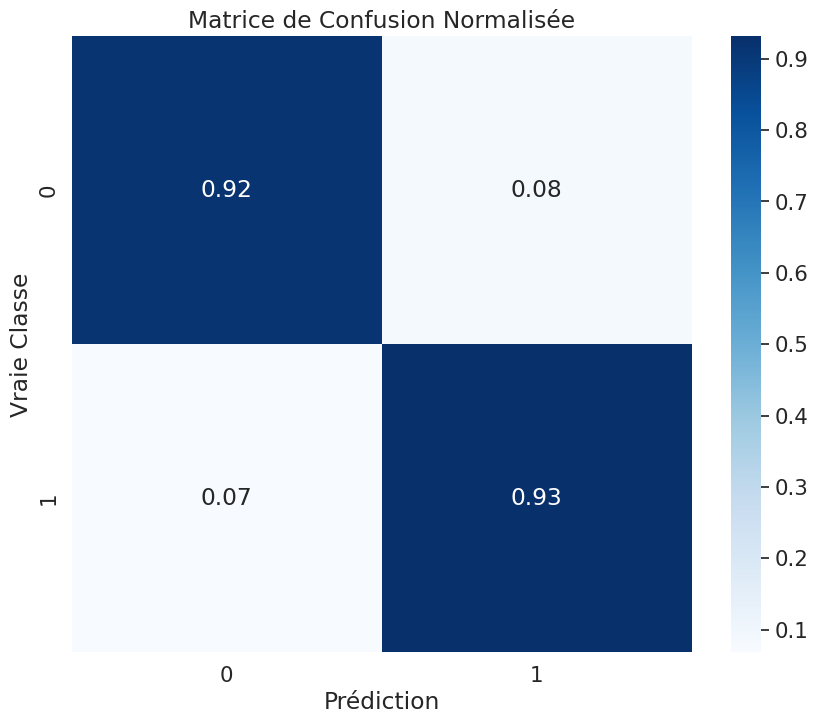

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10204
           1       0.92      0.93      0.92      9796

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting with a test dataset
y_pred = tfidf_clf.predict(X_val)

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)

# Normalisation de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Créer un graphique de matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names_str, yticklabels=class_names_str)
plt.title("Matrice de Confusion Normalisée")
plt.xlabel("Prédiction")
plt.ylabel("Vraie Classe")
plt.show()

# Rapport de classification
print("Classification Report:")
print(metrics.classification_report(y_val, y_pred, target_names=class_names_str))


# Training best model

In [ ]:
best_clf = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True, ngram_range=(1, 2),
        max_df=0.75
    )),
    ('clf', LogisticRegression(
        C=1300, penalty='l2',
        n_jobs=-1, verbose=1
    )),
])

best_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.75, ngram_range=(1, 2))),
                ('clf', LogisticRegression(C=1300, n_jobs=-1, verbose=1))])

## Results

In [ ]:
from sklearn import metrics

y_pred = best_clf.predict(X_val)

print("Val Accuracy: {:.2f}".format(100 * metrics.accuracy_score(y_val, y_pred)))
print("Val F1-Score: {:.2f}".format(100 * metrics.f1_score(y_val, y_pred)))
print()

report = metrics.classification_report(
    y_val, y_pred,
    target_names=class_names_str
)
print(report)

Val Accuracy: 94.33
Val F1-Score: 94.27

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10204
           1       0.93      0.95      0.94      9796

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



We can see clearly that the training score is still around the maximum and the validation score could be increased with more training samples.

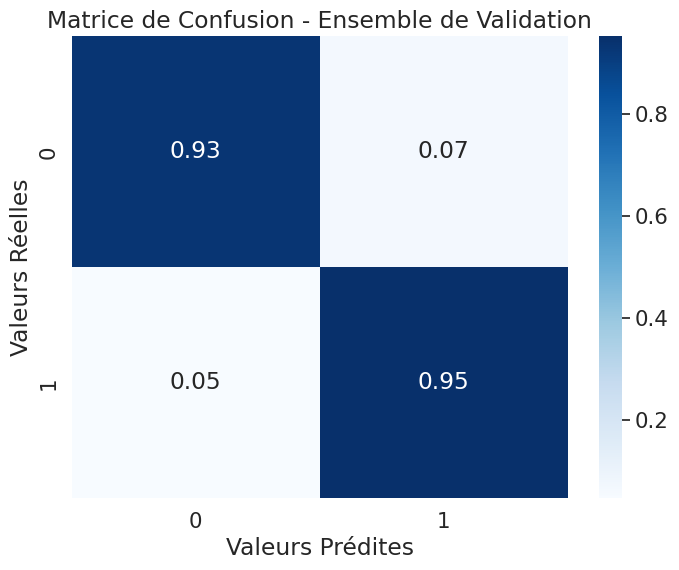

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de validation
y_pred = best_clf.predict(X_val)

# Calcul de la matrice de confusion
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Affichage avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)
plt.title('Matrice de Confusion - Ensemble de Validation')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.show()



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


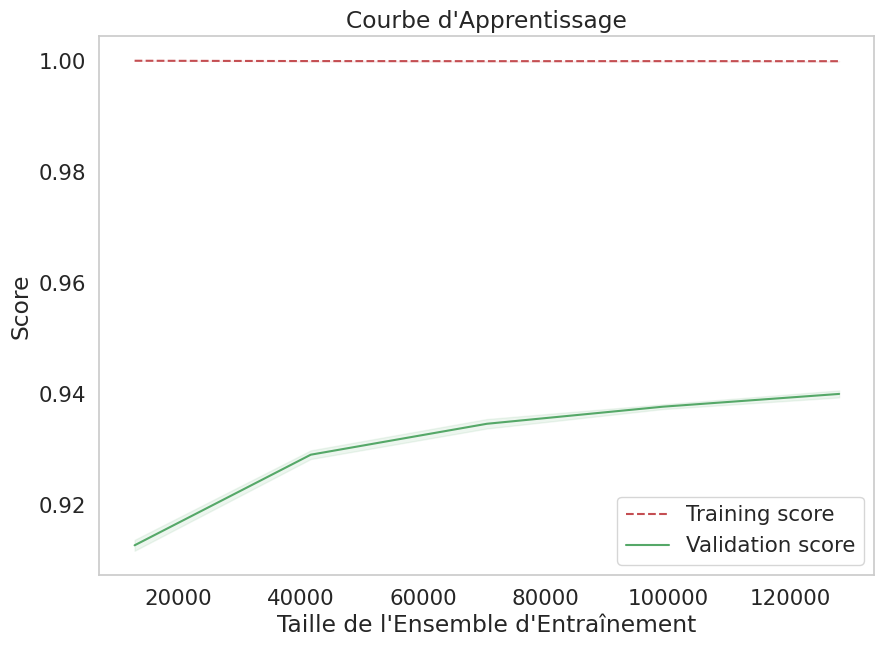

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Génère une courbe d'apprentissage pour un modèle donné.

    Parameters:
    - estimator : Le modèle à évaluer.
    - title : Le titre du graphique.
    - X : Les données d'entraînement.
    - y : Les étiquettes d'entraînement.
    - ylim : L'intervalle y à utiliser pour le graphique.
    - cv : La stratégie de validation croisée.
    - n_jobs : Le nombre de travaux parallèles à exécuter (-1 pour utiliser tous les cœurs disponibles).
    - train_sizes : Les tailles des ensembles d'entraînement à utiliser.

    Returns:
    - Un graphique de la courbe d'apprentissage.
    """
    plt.figure(figsize=(10, 7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Taille de l'Ensemble d'Entraînement")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, '--', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g", label="Validation score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    return plt

# Utilisation de la fonction pour tracer la courbe d'apprentissage
plot_learning_curve(best_clf, "Courbe d'Apprentissage", X_train, y_train, cv=5, n_jobs=-1)
plt.show()


## Save

# Testing best model

In [ ]:
from sklearn import metrics

y_pred = best_clf.predict(X_test)

print("Test Accuracy: {:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred)))
print("Test F1-Score: {:.2f}".format(100 * metrics.f1_score(y_test, y_pred)))
print()

report = metrics.classification_report(
    y_test, y_pred,
    target_names=class_names.values()
)
print(report)

Test Accuracy: 94.38
Test F1-Score: 94.18

              precision    recall  f1-score   support

    Negative       0.95      0.94      0.95     10408
    Positive       0.94      0.95      0.94      9592

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



## Inference time

In [ ]:
import time

inference_times = []

for i in range(1000):
    x = np.array([X_test[i], ])
    start_time = time.time()
    y_pred = best_clf.predict(x)
    stop_time = time.time()

    inference_times.append(stop_time - start_time)



save


In [ ]:
import joblib
from sklearn import metrics

# Save the trained model (including the pipeline) using joblib
joblib.dump(best_clf, 'best_model.pkl')
loaded_model = joblib.load('best_model.pkl')


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer  # Use the appropriate vectorizer for your model
from sklearn.preprocessing import LabelEncoder  # Use the appropriate encoder for your model

# Load the saved model
loaded_model = joblib.load('/content/best_model.pkl')

# Preprocess the input phrase (replace this with your actual input)
input_phrase = "j'ai ressenti le besoin d'être créatif"

# Use the loaded model to make predictions on the preprocessed input
predicted_label = loaded_model.predict([input_phrase])[0]

print("Predicted Label:",class_names[predicted_label])

Predicted Label: Positive
